# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 1: Classic Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings
import matplotlib as plt

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')

# Date range
start = '2010-01-01'
end = '2023-05-24'

# Tickers of assets
assets = ['^KS200',
          '229200.KS',
          '143850.KS',
          '195930.KS',
          '238720.KS',
          '192090.KS',
          '148070.KS',
          '136340.KS',
          '182490.KS',
          '280940.KS',
          '130680.KS',
          '114800.KS',
          '138230.KS',
          '139660.KS',
          '130730.KS']

lables = ['KOSPI',
    'KOSDAQ',
    'S&P500',
    'STOXX50',
    'Nikkei225',
    'CSI300',
    '국채10년',
    '우량회사채',
    '해외채권',
    '금',
    'WTI',
    'KOSPI-Short',
    'US-Long',
    'US-Short',
    'MMF',]

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = lables

[*********************100%***********************]  15 of 15 completed


In [3]:
# Calculating returns

Y = data[lables].pct_change().dropna()

display(Y.head())

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
Date,,,,,,,,,,,,,,,
2017-11-10,0.003439,0.003606,-0.000049,-0.000049,0.001310,-0.000448,-0.002113,-0.000087,-0.000902,0.016520,-0.009583,0.019814,-0.007950,-0.003014,-0.003500
2017-11-13,0.004284,-0.002395,0.000049,-0.000980,0.003489,-0.003136,-0.002443,-0.003651,0.000000,0.003792,-0.003366,0.040048,-0.013937,0.006549,-0.004852
2017-11-14,0.000853,-0.006002,-0.000049,-0.000147,-0.002173,0.002247,-0.001143,-0.001221,-0.003610,-0.003778,-0.008020,0.038506,-0.001060,-0.001502,-0.002124
2017-11-15,0.004263,-0.028986,0.000098,0.000245,-0.005227,0.004484,-0.000817,0.001441,0.000453,-0.013543,-0.007660,0.026799,-0.014149,-0.002005,-0.004346
2017-11-16,-0.005093,0.007463,-0.000049,0.000736,-0.009632,0.011607,0.000000,0.003358,-0.002263,-0.001098,0.004288,0.018949,0.012558,0.003014,0.006593


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
weights,2.326146e-09,0.001838,0.277062,0.32367,0.232192,0.094127,0.036717,1.829637e-10,0.013918,4.277016e-08,4.462007e-10,0.004409,0.016066,5.568058e-11,6.090596e-10


### 2.2 Plotting portfolio composition

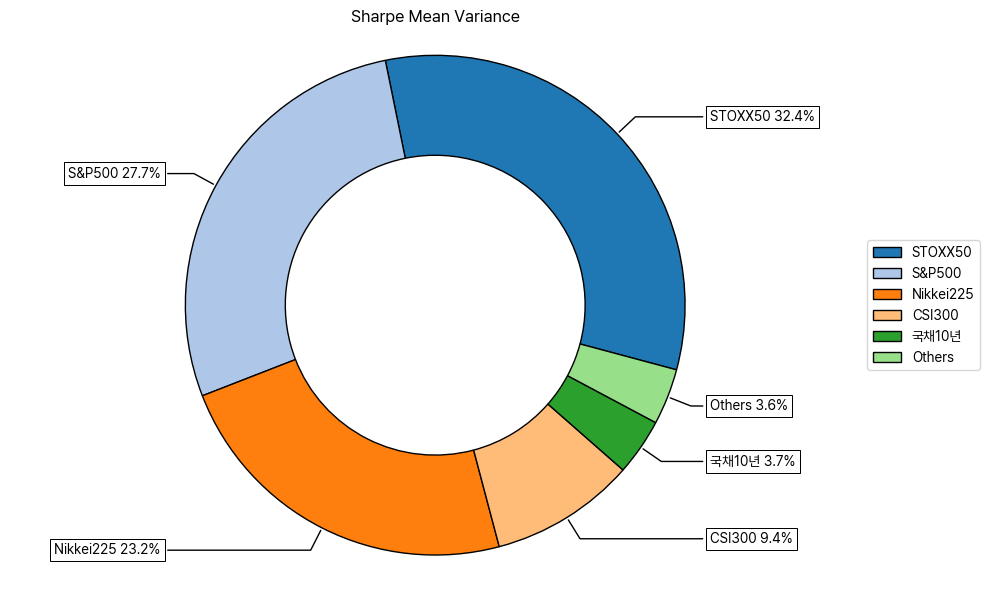

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
0,6.903757e-02,0.000751,0.241364,0.180691,0.216290,2.120094e-01,0.000440,9.244260e-08,3.835898e-07,1.000076e-03,2.462110e-07,0.002225,0.004838,6.012854e-03,6.533990e-02
1,6.920823e-05,0.001516,0.288597,0.296377,0.233661,1.227352e-01,0.028651,5.222165e-09,1.086963e-02,2.443635e-07,1.566375e-08,0.003773,0.013750,1.837051e-09,1.919711e-08
2,1.694582e-08,0.002234,0.262918,0.357013,0.230337,5.913484e-02,0.046600,3.632071e-09,1.764100e-02,1.854274e-07,6.586544e-09,0.005208,0.018913,8.864159e-10,9.513999e-09
3,7.863538e-09,0.002885,0.239703,0.411776,0.227284,1.657353e-03,0.062830,2.305820e-09,2.375585e-02,1.432035e-07,4.746479e-09,0.006520,0.023588,5.019751e-10,5.102308e-09
4,4.926085e-09,0.003205,0.139130,0.436002,0.277975,2.061923e-08,0.079421,2.508194e-09,2.805785e-02,3.027323e-07,4.195384e-09,0.007961,0.028248,4.682168e-10,5.997135e-09


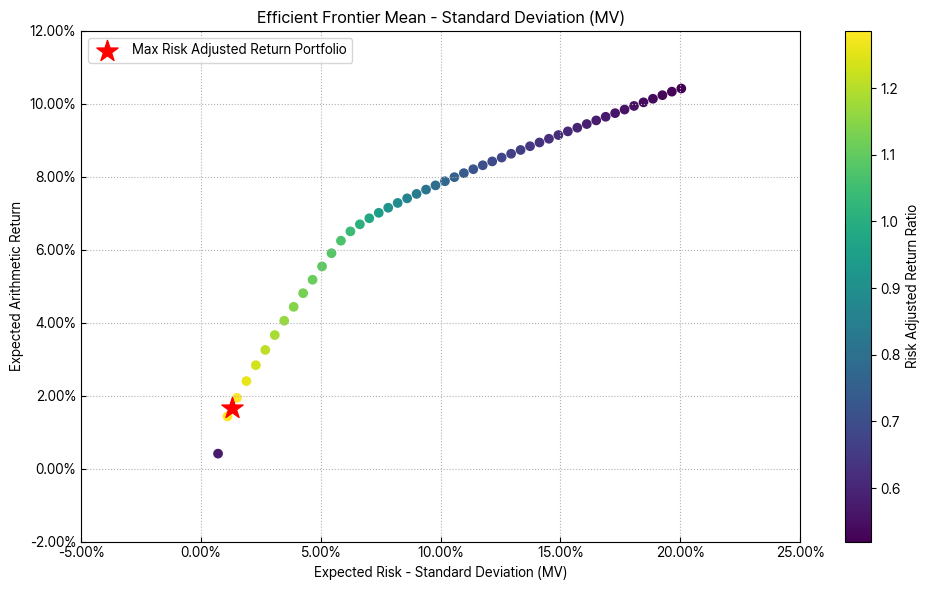

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

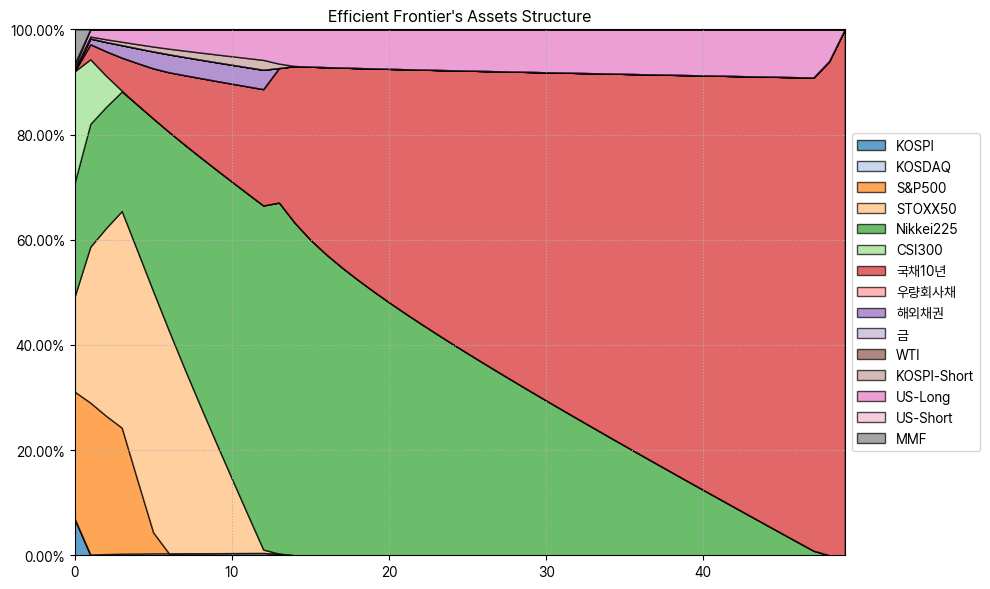

In [8]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [9]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
weights,1.879816e-13,6.436618e-15,0.140812,0.275103,0.335861,0.183301,0.041582,7.194486e-15,0.003825,1.192685e-14,8.843930e-15,0.011456,0.00806,2.114913e-15,3.330798e-14


### 3.2 Plotting portfolio composition

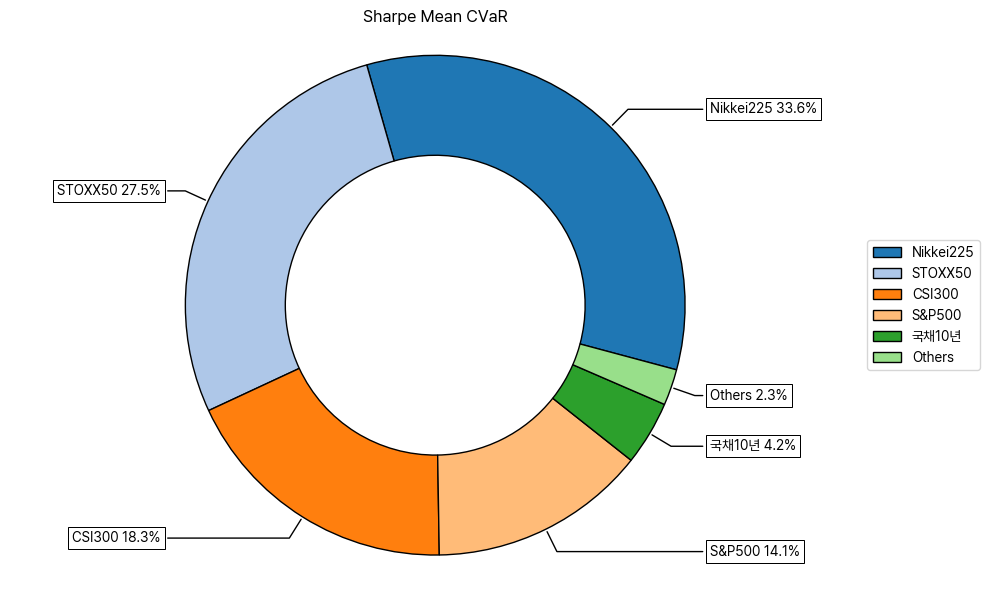

In [10]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [11]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
0,2.099495e-02,1.980754e-15,7.395416e-01,0.041957,0.089620,0.083350,0.000715,1.795203e-14,5.407734e-14,3.710303e-14,1.363827e-13,0.000908,0.002860,5.067210e-04,1.954433e-02
1,2.162718e-12,7.884067e-14,1.743718e-01,0.275073,0.311250,0.189232,0.030635,1.111837e-13,1.053060e-12,1.906991e-13,2.079808e-13,0.008898,0.008770,4.086012e-14,1.770002e-03
2,8.149066e-13,9.833644e-14,1.610578e-01,0.337821,0.304525,0.110596,0.053071,1.017108e-13,7.919959e-03,2.596508e-13,1.296955e-13,0.015866,0.009144,2.363603e-14,5.482085e-13
3,2.203662e-12,4.376028e-13,6.532205e-02,0.384899,0.346939,0.087881,0.072524,1.344295e-13,1.203091e-02,3.541244e-13,2.057541e-13,0.017529,0.012876,2.860332e-14,3.551599e-13
4,2.225753e-03,8.972034e-13,8.225364e-12,0.468417,0.352003,0.034357,0.090070,1.977665e-13,1.349602e-02,4.989919e-13,4.185638e-13,0.020231,0.019200,4.432097e-14,4.684470e-13


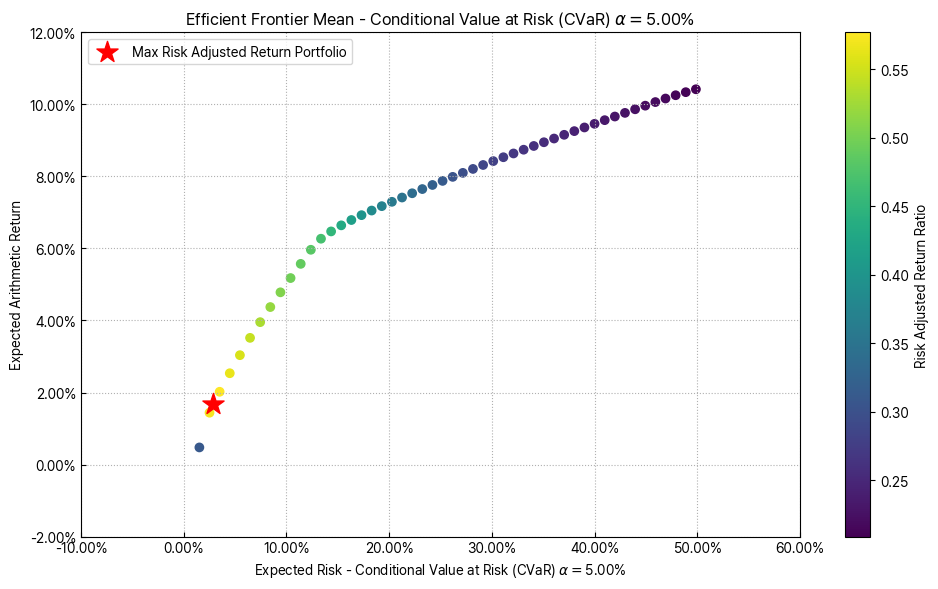

In [12]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

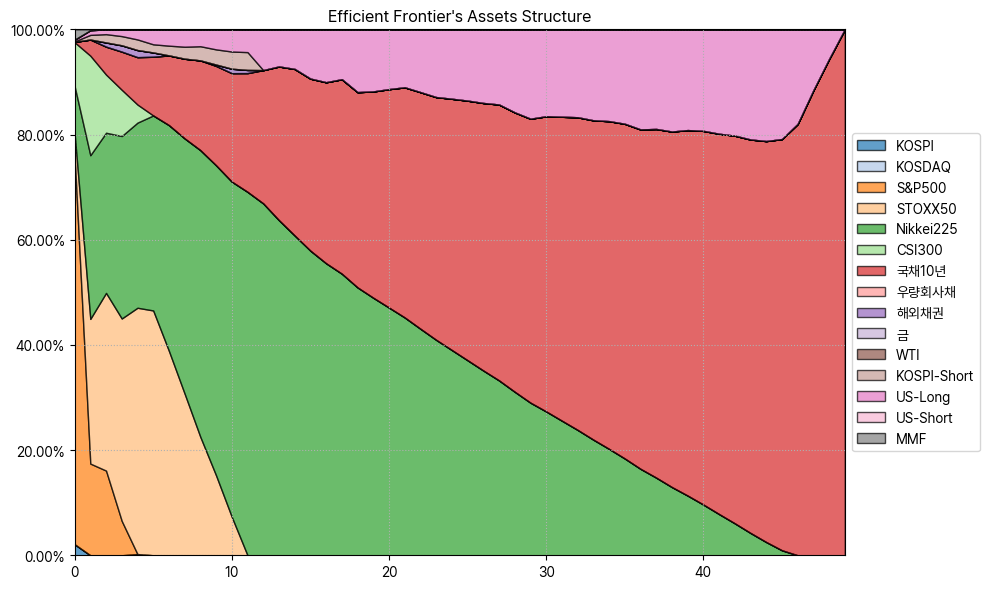

In [13]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [14]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [15]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
KOSPI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.42%,1.92%,0.00%,0.00%,0.00%,0.00%,0.00%
KOSDAQ,0.18%,0.00%,0.08%,0.01%,0.07%,0.00%,0.18%,0.46%,0.00%,0.13%,0.00%,0.00%,0.00%
S&P500,27.71%,94.07%,18.77%,92.96%,18.07%,14.08%,1.35%,8.45%,13.56%,9.40%,8.05%,5.21%,12.82%
STOXX50,32.37%,1.37%,35.25%,1.77%,35.33%,27.51%,45.46%,58.10%,21.90%,11.61%,16.02%,13.30%,20.63%
Nikkei225,23.22%,2.71%,27.34%,3.11%,27.73%,33.59%,29.90%,19.01%,34.38%,40.60%,39.61%,42.24%,35.34%
CSI300,9.41%,1.19%,11.23%,1.43%,11.47%,18.33%,14.56%,3.66%,26.63%,34.27%,32.87%,35.27%,27.84%
국채10년,3.67%,0.39%,4.03%,0.41%,4.05%,4.16%,3.22%,5.42%,0.07%,1.37%,0.00%,1.12%,0.00%
우량회사채,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
해외채권,1.39%,0.03%,0.74%,0.04%,0.69%,0.38%,0.00%,1.51%,0.00%,0.00%,0.00%,0.00%,0.00%
금,0.00%,0.02%,0.00%,0.00%,0.00%,0.00%,0.00%,0.59%,0.38%,0.00%,0.40%,0.00%,0.53%


<Axes: >

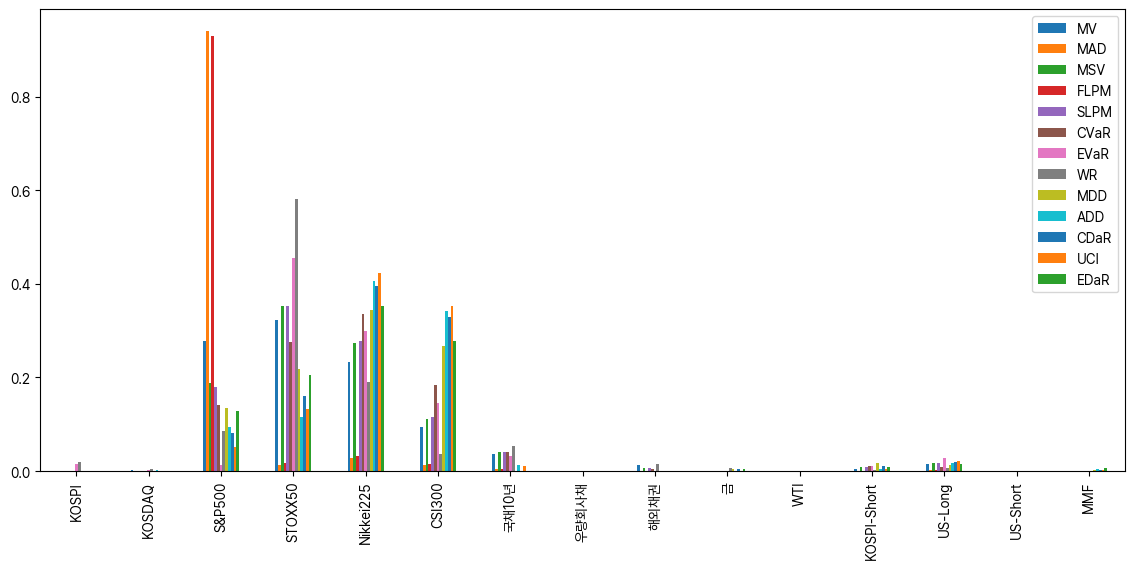

In [16]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4. Constraints on Assets and Assets Classes

### 4.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [37]:
Asset = ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
Class = ['DS', 'DS', 'FS', 'FS', 'FS', 'FS', 'Bond', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'FX', 'Cash']
Disabled = [False] * 27
Disabled[1] = True
Type = ['Classes'] * 11 + ['Assets'] * 16
Set = ['Class'] * 11 + [''] * 16
Position = ['DS', 'DS', 'FS', 'FS', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'Cash',
            'KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300',
            '국채10년', '우량회사채', '해외채권',
            '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short',
            'MMF', '해외채권']
TypeRelative=  [''] * 27
RelativeSet =  [''] * 27
Relative = [''] * 27
Factor = [''] * 27

# DS상하한(2), FS상하한(2), Bond상하한(2), COM상하한(2), Inverse(1), FX(1), Cash(1)
# KOSPI상한, #KOSDAQ상한, S&P상한, STO상한, Nik상한, CSI상한,
# 국채상한, 회사채상한, 해채상한,
# 금, WTI, 코숏, 달러롱, 달러숏,
# 현금하한, 해채하한
Sign = ['<=', '>=', '<=', '>=', '<=', '>=', '<=', '>=', '<=', '<=', '<=', 
        '<=', '<=', '<=', '<=', '<=', '<=',
        '<=', '<=', '<=',
        '<=', '<=', '<=', '<=', '<=',
        '>=', '>=']

Weight = [0.40, 0.10, 0.40, 0.10, 0.60, 0.20, 0.20, 0.05, 0.20, 0.20, 0.50,
          0.40, 0.20, 0.20, 0.20, 0.20, 0.20,
          0.50, 0.40, 0.40,
          0.15, 0.15, 0.20, 0.20, 0.20,
          0.01, 0.05]

constraints_list = [Asset, Class, Disabled, Type, Set, Position, Sign, Weight]
for i in constraints_list:
    print(constraints_list.index(i) , len(i))

0 15
1 15
2 27
3 27
4 27
5 27
6 27
7 27


In [38]:
asset_classes = {'Assets': Asset,
                 'Class': Class
                 }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': Disabled,
               'Type': Type,
               'Set': Set,
               'Position': Position,
               'Sign': Sign,
               'Weight': Weight,
               'Type Relative': TypeRelative,
               'Relative Set': RelativeSet,
               'Relative': Relative,
               'Factor': Factor
}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Classes,Class,DS,<=,0.40,,,,
1,True,Classes,Class,DS,>=,0.10,,,,
2,False,Classes,Class,FS,<=,0.40,,,,
3,False,Classes,Class,FS,>=,0.10,,,,
4,False,Classes,Class,Bond,<=,0.60,,,,
5,False,Classes,Class,Bond,>=,0.20,,,,
6,False,Classes,Class,COM,<=,0.20,,,,
7,False,Classes,Class,COM,>=,0.05,,,,
8,False,Classes,Class,Inverse,<=,0.20,,,,
9,False,Classes,Class,FX,<=,0.20,,,,


In [39]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [40]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
weights,0.179481,0.002758,7.581913e-07,0.19994,0.289938,6.337424e-07,0.069156,1.835716e-07,0.008725,2.099355e-07,0.008347,0.017757,0.041653,3.316915e-08,0.182243


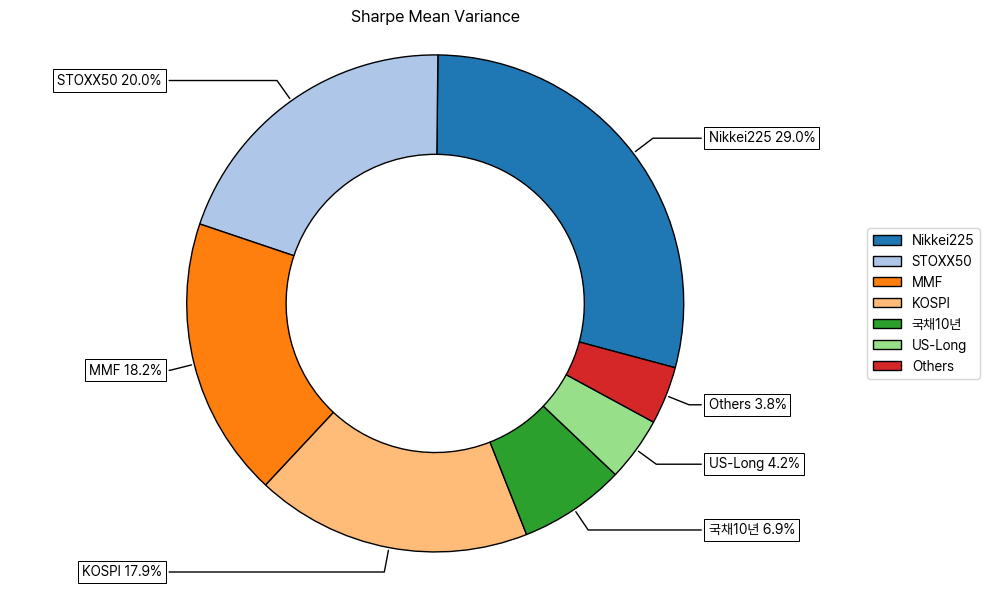

In [41]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [42]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Class,weights
CSI300,FS,6.337424e-07
KOSDAQ,DS,2.758180e-03
KOSPI,DS,1.794810e-01
KOSPI-Short,Inverse,1.775678e-02
MMF,Cash,1.822433e-01
Nikkei225,FS,2.899379e-01
S&P500,FS,7.581913e-07
STOXX50,FS,1.999400e-01
US-Long,FX,4.165294e-02
US-Short,FX,3.316915e-08


In [43]:
w_classes = w_classes.groupby(['Class']).sum()

display(w_classes)

,weights
Class,
Bond,0.077881
COM,0.008347
Cash,0.182243
DS,0.182239
FS,0.489879
FX,0.041653
Inverse,0.017757


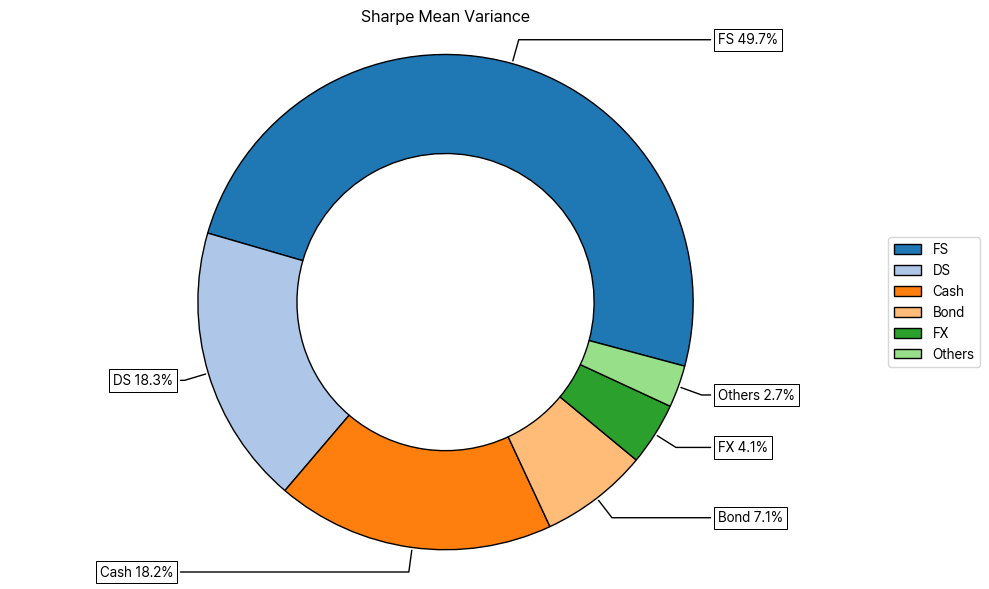

In [29]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [30]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
0,0.200000,3.173765e-09,0.100000,0.149184,0.157519,1.432967e-01,1.552000e-09,1.355917e-08,6.152328e-09,5.068344e-09,0.023715,0.001456,0.026285,1.677128e-02,0.181773
1,0.196085,2.484241e-03,0.097516,0.200000,0.187986,4.598277e-02,1.994625e-02,9.433754e-10,5.559881e-09,6.192557e-10,0.018708,0.010291,0.031292,2.213649e-10,0.189709
2,0.190782,2.878236e-03,0.097122,0.200000,0.207463,2.651683e-03,4.073979e-02,3.239294e-09,8.363268e-03,2.557317e-09,0.014604,0.013160,0.035396,4.739481e-10,0.186840
3,0.181696,3.235030e-03,0.096765,0.145299,0.260094,9.752101e-10,5.988569e-02,8.244713e-10,3.025525e-03,6.643563e-10,0.010419,0.017114,0.039581,1.569515e-10,0.182886
4,0.175332,3.430530e-03,0.096569,0.079474,0.311551,4.162399e-09,7.798894e-02,2.875495e-09,5.653767e-03,2.922543e-09,0.006698,0.020520,0.043302,6.377411e-10,0.179480


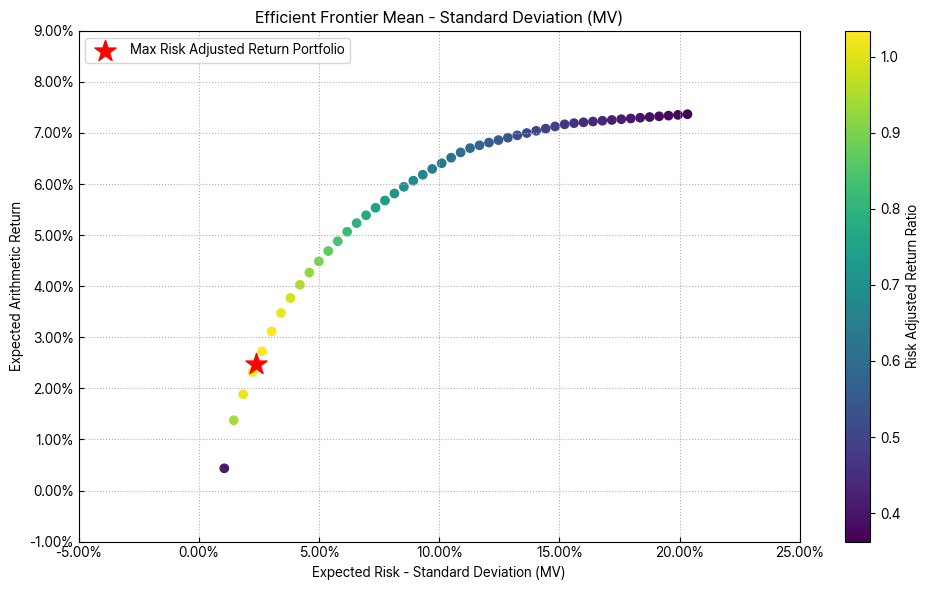

In [31]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

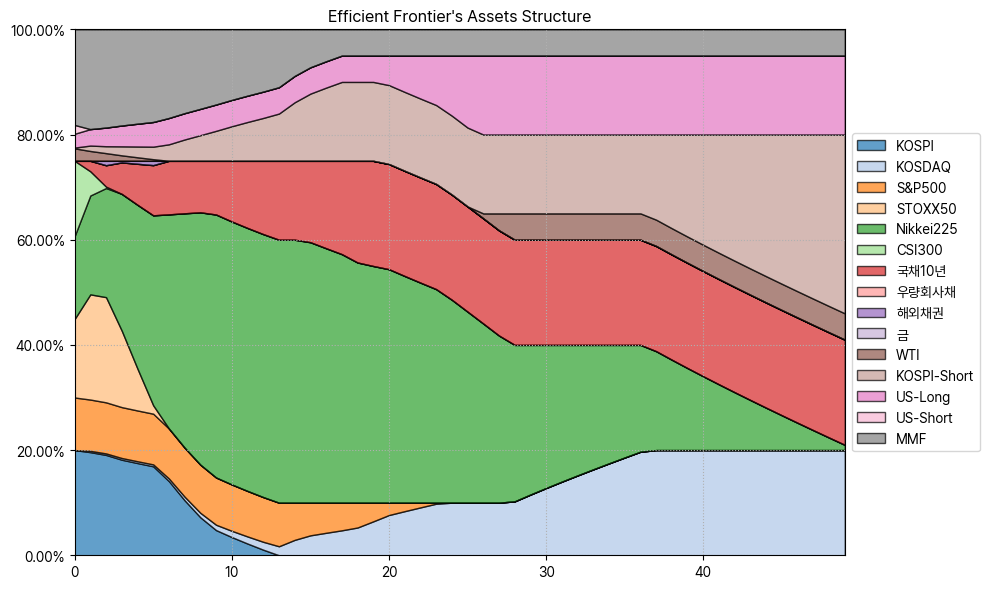

In [32]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [33]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
KOSPI,17.93%,17.29%,17.29%,17.38%,17.28%,17.76%,17.25%,17.18%,19.95%,18.16%,20.00%,19.36%,20.00%
KOSDAQ,0.33%,0.23%,0.16%,0.22%,0.16%,0.00%,0.65%,1.14%,0.00%,0.00%,0.00%,0.00%,0.00%
S&P500,9.67%,9.77%,9.84%,9.78%,9.84%,10.00%,9.35%,8.86%,22.52%,10.00%,10.00%,10.00%,20.67%
STOXX50,12.07%,9.94%,13.31%,10.82%,13.39%,12.95%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%
Nikkei225,27.93%,29.24%,28.17%,28.46%,28.14%,28.05%,24.90%,25.52%,12.53%,22.12%,18.37%,20.00%,13.57%
CSI300,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,6.05%,3.17%,0.00%
국채10년,6.66%,7.03%,6.23%,6.92%,6.18%,5.90%,2.85%,1.06%,0.00%,4.72%,0.58%,2.47%,0.76%
우량회사채,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
해외채권,0.40%,1.49%,0.00%,1.42%,0.00%,0.34%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
금,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.24%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

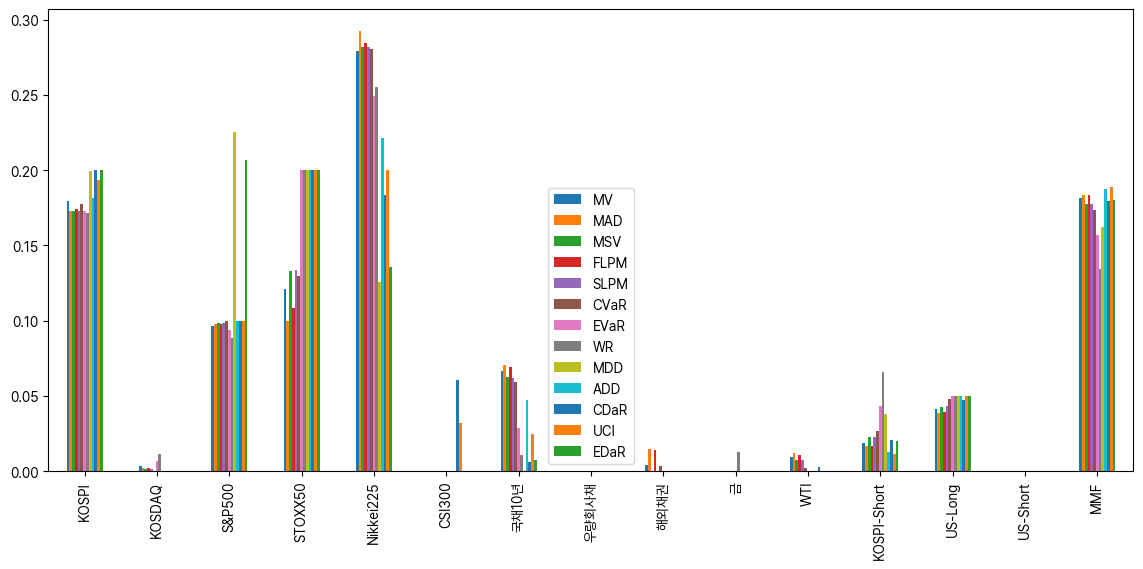

In [34]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)